# For learning purposes. Most of the code is not written by me!

In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import scikitplot as skplt

In [2]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


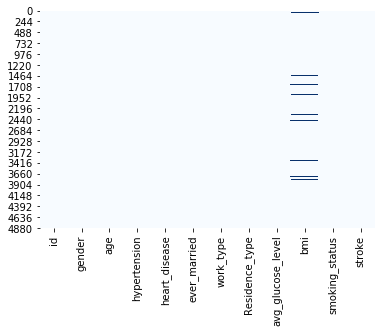

In [8]:
ax = plt.axes(facecolor = "#E6E6E6")
sns.heatmap(data = df.isnull(),cmap = "Blues",cbar = False, ax = ax)
ax.set_axisbelow(True)
plt.grid(color = "w", linestyle = "solid")

In [3]:
df.dropna(axis = 0, inplace =True)

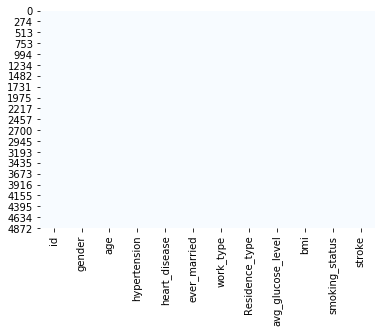

In [53]:
sns.heatmap(data = df.isnull(),cmap = "Blues",cbar = False)

Text(-20, 300, '*We see a positive skew in BMI and Glucose Level.')

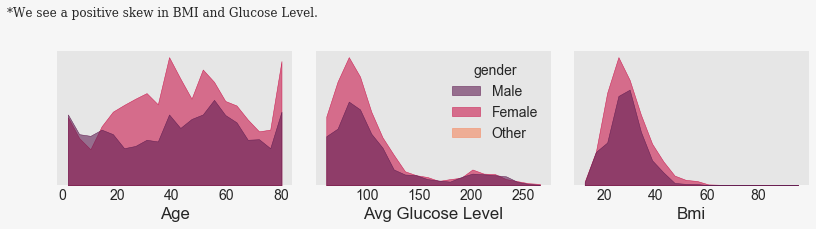

In [85]:
background_color = "#E6E6E6"
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)
plt.style.use("seaborn-dark")
hist_list = ["age","avg_glucose_level","bmi"]

i = 0
for row in range(1):
    for col in range(3):
        locals()["ax"+str(i)] = fig.add_subplot(gs[row,col]) 
        curr_ax = locals()["ax"+str(i)]
        curr_ax.set_axisbelow(True)
        curr_ax.set_facecolor(background_color)
        curr_ax.tick_params(axis='y', left=False)
        curr_ax.get_yaxis().set_visible(False)
        
        
        for spine in curr_ax.spines.values():
            spine.set_visible(False)
        i=i+1
        

for i in range(len(hist_list)):
    curr_ax = locals()["ax"+str(i)]
    
    if i == 1:
        sns.histplot(data = df, x = hist_list[i] ,ax= curr_ax, color='#ff6f61', alpha=0.6, hue = "gender",
                 zorder=3, legend=True, bins = 20, element="poly",palette= "rocket")
    else:
        sns.histplot(data = df, x = hist_list[i] ,ax= curr_ax, color='#ff6f61', alpha=0.6, hue = "gender",
                 zorder=3, legend=False, bins = 20, element="poly", palette= "rocket")
    curr_ax.set_xlabel(hist_list[i].replace("_"," ").title())
    

ax0.text(-20, 300, '*We see a positive skew in BMI and Glucose Level.', fontsize=12, fontweight='light', fontfamily='serif')

In [89]:
def encoder(data, columns, records):
    for col in columns:
        n_unique = data[col].nunique()
        encoder_dict = dict(zip(data[col].unique(),range(n_unique)))
        data[col] = data[col].map(encoder_dict)
        records[col] = encoder_dict

In [92]:
non_numeric_cols = list(df.select_dtypes(['object']).columns)
records = dict()

In [93]:
encoder(df, non_numeric_cols, records)

In [94]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,0,0,228.69,36.6,0,1
2,31112,0,80.0,0,1,0,0,1,105.92,32.5,1,1
3,60182,1,49.0,0,0,0,0,0,171.23,34.4,2,1
4,1665,1,79.0,1,0,0,1,1,174.12,24.0,1,1
5,56669,0,81.0,0,0,0,0,0,186.21,29.0,0,1


In [55]:
variables = [variable for variable in df.columns if variable not in ['id','stroke']]

conts = ['age','avg_glucose_level','bmi']

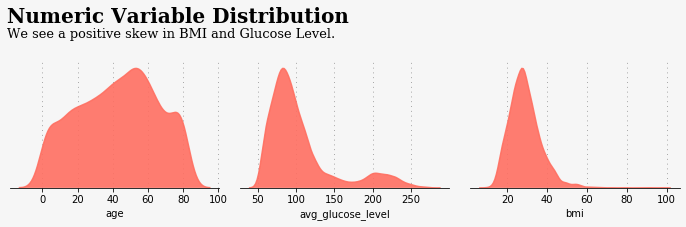

In [56]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"

run_no = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0
for variable in conts:
        sns.kdeplot(df[variable] ,ax=locals()["ax"+str(run_no)], color='#ff6f61', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(variable)
        run_no += 1
        
ax0.text(-20, 0.022, 'Numeric Variable Distribution', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.02, 'We see a positive skew in BMI and Glucose Level.', fontsize=13, fontweight='light', fontfamily='serif')


#ax15.get_xaxis().set_visible(False)
plt.show()

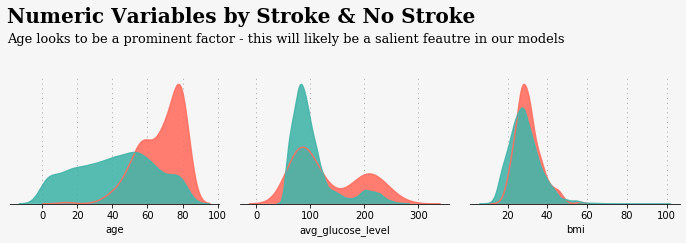

In [57]:
fig = plt.figure(figsize=(12, 12), facecolor='#f6f6f6')
gs = fig.add_gridspec(4, 3)
gs.update(wspace=0.1, hspace=0.4)

background_color = "#f6f6f6"

run_no = 0
for row in range(0, 1):
    for col in range(0, 3):
        locals()["ax"+str(run_no)] = fig.add_subplot(gs[row, col])
        locals()["ax"+str(run_no)].set_facecolor(background_color)
        locals()["ax"+str(run_no)].tick_params(axis='y', left=False)
        locals()["ax"+str(run_no)].get_yaxis().set_visible(False)
        for s in ["top","right","left"]:
            locals()["ax"+str(run_no)].spines[s].set_visible(False)
        run_no += 1

run_no = 0

s = df[df['stroke'] == 1]
ns = df[df['stroke'] == 0]

for feature in conts:
        sns.kdeplot(s[feature], ax=locals()["ax"+str(run_no)], color='#ff6f61', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        sns.kdeplot(ns[feature],ax=locals()["ax"+str(run_no)], color='#45b5aa', shade=True, linewidth=1.5, alpha=0.9, zorder=3, legend=False)
        locals()["ax"+str(run_no)].grid(which='major', axis='x', zorder=0, color='gray', linestyle=':', dashes=(1,5))
        locals()["ax"+str(run_no)].set_xlabel(feature)
        run_no += 1
        
ax0.text(-20, 0.056, 'Numeric Variables by Stroke & No Stroke', fontsize=20, fontweight='bold', fontfamily='serif')
ax0.text(-20, 0.05, 'Age looks to be a prominent factor - this will likely be a salient feautre in our models', 
         fontsize=13, fontweight='light', fontfamily='serif')

plt.show()

In [58]:
str_only = df[df['stroke'] == 1]
no_str_only = df[df['stroke'] == 0]

C:\Users\merts\AppData\Roaming\Python\Python37\site-packages\seaborn\regression.py:279: RuntimeWarning: invalid value encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]


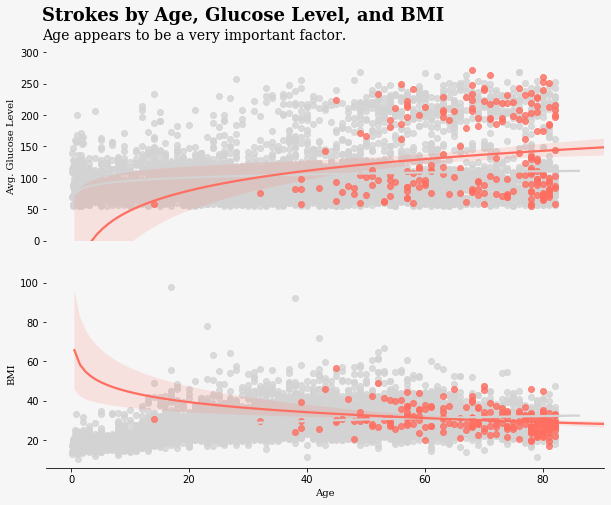

In [59]:
background_color = "#f6f6f6"

fig = plt.figure(figsize=(10,16),facecolor='#f6f6f6') # create figure
gs = fig.add_gridspec(4, 2)
gs.update(wspace=0.5, hspace=0.2)
ax0 = fig.add_subplot(gs[0, 0:2])
ax1 = fig.add_subplot(gs[1, 0:2]) # create axes

ax0.set_facecolor(background_color)
ax1.set_facecolor(background_color)

# glucose

sns.regplot(no_str_only['age'],y=no_str_only['avg_glucose_level'],  
            color='lightgray',
            logx=True,
            ax=ax0)

sns.regplot(str_only['age'],y=str_only['avg_glucose_level'],  
            color='#ff6f61',
            logx=True,
            ax=ax0)

ax0.set(ylim=(0, None))
ax0.set_xlabel(" ",fontsize=12,fontfamily='serif')
ax0.set_ylabel("Avg. Glucose Level",fontsize=10,fontfamily='serif')

ax0.tick_params(axis='x', bottom=False)
ax0.get_xaxis().set_visible(False)

for s in ['top','left','bottom']:
    ax0.spines[s].set_visible(False)


# bmi
sns.regplot(no_str_only['age'],y=no_str_only['bmi'],  
            color='lightgray',
            logx=True,
            ax=ax1)

sns.regplot(str_only['age'],y=str_only['bmi'],  
            color='#ff6f61',
            logx=True,
            ax=ax1)

ax1.set_xlabel("Age",fontsize=10,fontfamily='serif')
ax1.set_ylabel("BMI",fontsize=10,fontfamily='serif')


for s in ['top','left','right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)

    
ax0.text(-5,350,'Strokes by Age, Glucose Level, and BMI',fontsize=18,fontfamily='serif',fontweight='bold')
ax0.text(-5,320,'Age appears to be a very important factor.',fontsize=14,fontfamily='serif')


plt.show()

In [60]:
no_str_only = no_str_only[(no_str_only['gender'] != 'Other')]

no_str_only.gender.value_counts()

Female    2777
Male      1922
Name: gender, dtype: int64

In [61]:
train_graph_temp_df = pd.DataFrame(str_only["work_type"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["work_type"].apply(lambda x: x/sum(train_graph_temp_df["work_type"])*100)
train_graph_temp_df = train_graph_temp_df.sort_index()

test_graph_temp_df = pd.DataFrame(no_str_only["work_type"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["work_type"].apply(lambda x: x/sum(test_graph_temp_df["work_type"])*100)
test_graph_temp_df = test_graph_temp_df.sort_index()

ax0.bar(np.arange(len(train_graph_temp_df.index)), height=train_graph_temp_df["Percentage"], zorder=3, color="gray", width=0.05)
ax0.scatter(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3,s=200, color="gray")
ax0.bar(np.arange(len(test_graph_temp_df.index))+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#0e4f66", width=0.05)
ax0.scatter(np.arange(len(test_graph_temp_df.index))+0.4, test_graph_temp_df["Percentage"], zorder=3,s=200, color="#0e4f66")

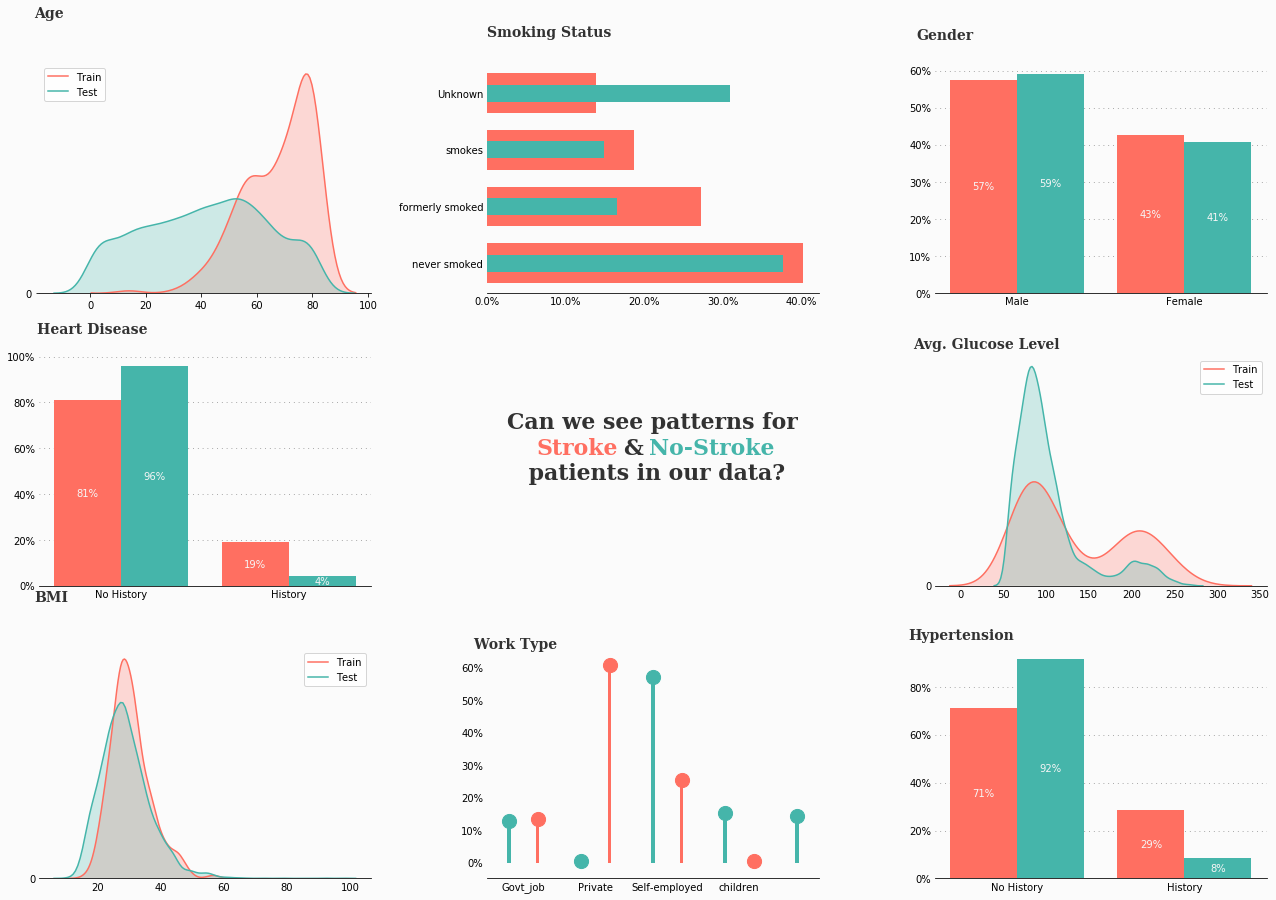

In [62]:
fig = plt.figure(figsize=(22,15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])

background_color = "#fbfbfb"
fig.patch.set_facecolor(background_color) # figure background color
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color) 
ax4.set_facecolor(background_color) 
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color) 
ax8.set_facecolor(background_color) 

# Plots

## Age


ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_graph_temp_df = pd.DataFrame(str_only["age"])
test_graph_temp_df = pd.DataFrame(no_str_only["age"])
sns.kdeplot(train_graph_temp_df["age"], ax=ax0,color="#ff6f61", shade=True, label="Train")
sns.kdeplot(test_graph_temp_df["age"], ax=ax0, color="#45b5aa", shade=True, label="Test")
#ax3.text(0.29, 13, 'Age', 
 #        fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax0.set_ylabel('')    
ax0.set_xlabel('')
ax0.text(-20, 0.0465, 'Age', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# Smoking
train_graph_temp_df = pd.DataFrame(str_only["smoking_status"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["smoking_status"].apply(lambda x: x/sum(train_graph_temp_df["smoking_status"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["smoking_status"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["smoking_status"].apply(lambda x: x/sum(test_graph_temp_df["smoking_status"])*100)

ax1.text(0, 4, 'Smoking Status', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax1.barh(train_graph_temp_df.index, train_graph_temp_df['Percentage'], color="#ff6f61", zorder=3, height=0.7)
ax1.barh(test_graph_temp_df.index, test_graph_temp_df['Percentage'], color="#45b5aa", zorder=3, height=0.3)
ax1.xaxis.set_major_formatter(mtick.PercentFormatter())
ax1.xaxis.set_major_locator(mtick.MultipleLocator(10))

##
# Ax2 - GENDER 
train_graph_temp_df = pd.DataFrame(str_only["gender"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["gender"].apply(lambda x: x/sum(train_graph_temp_df["gender"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["gender"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["gender"].apply(lambda x: x/sum(test_graph_temp_df["gender"])*100)

x = np.arange(len(train_graph_temp_df))
ax2.text(-0.4, 68.5, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax2.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax2.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.4)
ax2.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.4)
ax2.set_xticks(x + 0.4 / 2)
ax2.set_xticklabels(['Male','Female'])
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2.yaxis.set_major_locator(mtick.MultipleLocator(10))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax2.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')

    

# Heart Dis

train_graph_temp_df = pd.DataFrame(str_only["heart_disease"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["heart_disease"].apply(lambda x: x/sum(train_graph_temp_df["heart_disease"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["heart_disease"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["heart_disease"].apply(lambda x: x/sum(test_graph_temp_df["heart_disease"])*100)

x = np.arange(len(train_graph_temp_df))
ax3.text(-0.3, 110, 'Heart Disease', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax3.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax3.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.4)
ax3.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.4)
ax3.set_xticks(x + 0.4 / 2)
ax3.set_xticklabels(['No History','History'])
ax3.yaxis.set_major_formatter(mtick.PercentFormatter())
ax3.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax3.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
    

## AX4 - TITLE

ax4.spines["bottom"].set_visible(False)
ax4.tick_params(left=False, bottom=False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.text(0.5, 0.6, 'Can we see patterns for\n\n patients in our data?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax4.text(0.15,0.57,"Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#ff6f61')
ax4.text(0.41,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax4.text(0.49,0.57,"No-Stroke", fontweight="bold", fontfamily='serif', fontsize=22, color='#45b5aa')


# Glucose

ax5.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_graph_temp_df = pd.DataFrame(str_only["avg_glucose_level"])
test_graph_temp_df = pd.DataFrame(no_str_only["avg_glucose_level"])
sns.kdeplot(train_graph_temp_df["avg_glucose_level"], ax=ax5,color="#ff6f61", shade=True, label="Train")
sns.kdeplot(test_graph_temp_df["avg_glucose_level"], ax=ax5, color="#45b5aa", shade=True, label="Test")
ax5.text(-55, 0.01855, 'Avg. Glucose Level', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax5.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax5.set_ylabel('')    
ax5.set_xlabel('')



## BMI


ax6.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_graph_temp_df = pd.DataFrame(str_only["bmi"])
test_graph_temp_df = pd.DataFrame(no_str_only["bmi"])
sns.kdeplot(train_graph_temp_df["bmi"], ax=ax6,color="#ff6f61", shade=True, label="Train")
sns.kdeplot(test_graph_temp_df["bmi"], ax=ax6, color="#45b5aa", shade=True, label="Test")
ax6.text(-0.06, 0.09, 'BMI', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax6.yaxis.set_major_locator(mtick.MultipleLocator(2))
ax6.set_ylabel('')    
ax6.set_xlabel('')


# Work Type

train_graph_temp_df = pd.DataFrame(str_only["work_type"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["work_type"].apply(lambda x: x/sum(train_graph_temp_df["work_type"])*100)
train_graph_temp_df = train_graph_temp_df.sort_index()

test_graph_temp_df = pd.DataFrame(no_str_only["work_type"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["work_type"].apply(lambda x: x/sum(test_graph_temp_df["work_type"])*100)
test_graph_temp_df = test_graph_temp_df.sort_index()

ax7.bar(test_graph_temp_df.index, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.05)
ax7.scatter(test_graph_temp_df.index, test_graph_temp_df["Percentage"], zorder=3,s=200, color="#45b5aa")
ax7.bar(np.arange(len(train_graph_temp_df.index))+0.4, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.05)
ax7.scatter(np.arange(len(train_graph_temp_df.index))+0.4, train_graph_temp_df["Percentage"], zorder=3,s=200, color="#ff6f61")

ax7.yaxis.set_major_formatter(mtick.PercentFormatter())
ax7.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax7.set_xticks(np.arange(len(train_graph_temp_df.index))+0.4 / 2)
ax7.set_xticklabels(list(train_graph_temp_df.index),rotation=0)
ax7.text(-0.5, 66, 'Work Type', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")



# hypertension

train_graph_temp_df = pd.DataFrame(str_only["hypertension"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["hypertension"].apply(lambda x: x/sum(train_graph_temp_df["hypertension"])*100)
test_graph_temp_df = pd.DataFrame(no_str_only["hypertension"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["hypertension"].apply(lambda x: x/sum(test_graph_temp_df["hypertension"])*100)

x = np.arange(len(train_graph_temp_df))
ax8.text(-0.45, 100, 'Hypertension', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax8.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax8.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#ff6f61", width=0.4)
ax8.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#45b5aa", width=0.4)
ax8.set_xticks(x + 0.4 / 2)
ax8.set_xticklabels(['No History','History'])
ax8.yaxis.set_major_formatter(mtick.PercentFormatter())
ax8.yaxis.set_major_locator(mtick.MultipleLocator(20))
for i,j in zip([0, 1], train_graph_temp_df["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')
for i,j in zip([0, 1], test_graph_temp_df["Percentage"]):
    ax8.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6', horizontalalignment='center', verticalalignment='center')


# tidy up

ax1.tick_params(axis=u'both', which=u'both',length=0)
ax2.tick_params(axis=u'both', which=u'both',length=0)
ax3.tick_params(axis=u'both', which=u'both',length=0)
ax4.tick_params(axis=u'both', which=u'both',length=0)
ax5.tick_params(axis=u'both', which=u'both',length=0)
ax6.tick_params(axis=u'both', which=u'both',length=0)
ax7.tick_params(axis=u'both', which=u'both',length=0)
ax8.tick_params(axis=u'both', which=u'both',length=0)



for s in ["top","right","left"]:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    ax3.spines[s].set_visible(False)
    ax4.spines[s].set_visible(False)
    ax5.spines[s].set_visible(False)
    ax6.spines[s].set_visible(False)
    ax7.spines[s].set_visible(False)
    ax8.spines[s].set_visible(False)

plt.show()

In [63]:
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
df['Residence_type'] = df['Residence_type'].replace({'Rural':0,'Urban':1}).astype(np.uint8)
df['work_type'] = df['work_type'].replace({'Private':0,'Self-employed':1,'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)

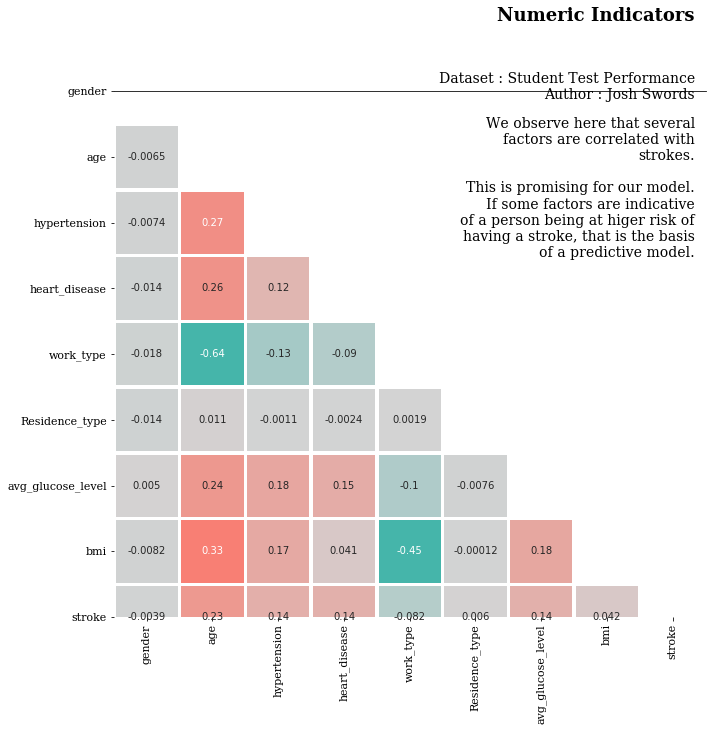

In [64]:
import matplotlib
corr_df = df.drop(['id'], axis=1)

#background_color = "#fbfbfb"
#fig.patch.set_facecolor(background_color) # figure background color

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax.set_facecolor(background_color) 
corr = corr_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

colors = ["#45b5aa","lightgray", "#ff6f61"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=-0.4, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1.02, 'Numeric Indicators', fontweight='bold', fontfamily='serif', fontsize=18, ha='right')    
fig.text(0.97, 0.912, 'Dataset : Student Test Performance\nAuthor : Josh Swords', fontweight='light', fontfamily='serif', fontsize=14, ha='right')    

fig.text(0.97, 0.91, '''
We observe here that several
factors are correlated with
strokes.

This is promising for our model.
If some factors are indicative
of a person being at higer risk of
having a stroke, that is the basis
of a predictive model.''', 
         fontweight='light', fontfamily='serif', fontsize=14, va='top', ha='right') 

plt.tight_layout()
plt.show()